# $$ Amazon \ Products \ Sentiment \ Analysis $$

# **Goal**

* The ultimate goal is to increase the success rate of existing and new products.
* To build the required automated product review analyzing system.

# **To Install Required Libraries**

In [ ]:
!pip install fasttext
!pip install neattext
!pip install contractions
!pip install clean-text
!pip install textblob
!pip install pandas_bokeh
!pip install colorama
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.3-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-linux_x86_64.whl size=4402029 sha256=074604189d92b865780387296e27577a22a7fb9d3f7a276960a9f9e8facb2d37
  Stored in directory: /root/.cache/pip/wheels/93/61/2a/c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully built fasttext
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 KB 3.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 12.

# **Import Required Libraries**

In [ ]:
import pandas as pd
import fasttext
import contractions
import neattext.functions as nfx
from cleantext import clean
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
from sklearn.model_selection import train_test_split
import pandas_bokeh
pandas_bokeh.output_notebook()
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.naive_bayes import MultinomialNB
from colorama import Fore,Style
from googletrans import Translator

In [ ]:

trans=Translator()
def trans_fun(text):
  d=text
  t=trans.translate(d,dest='en')
  return t.text

# **To Load Data**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/A_exported_files/A_final_data.csv')

In [ ]:
# top 5 rows
data.head()

,reviewerID,product_id,reviewerName,verified,reviewText,rating,date,summary,brand,category,main_cat
0,A2YCGMW0ZKPYZ2,0788602144,Bernard Perusse,True,"The answer, of course, is no. A lot of time ha...",4,2002-07-08,Nostalgia: overrated?,Patrick Adiarte,"CDs & Vinyl,Classic Rock,British Invasion",Movies & TV
1,A5N992ESD6UHW,0967680654,Jonny Lee,True,"A bit outdated, from a special-effects/technol...",4,2016-06-21,Would be Nice to See This Effective Concept Re...,Daniel Kruse,"CDs & Vinyl,Christian,Pop & Contemporary",Movies & TV
2,A35L775VMC0BKL,0967680654,Fm,True,Thank you,5,2015-11-18,Five Stars,Daniel Kruse,"CDs & Vinyl,Christian,Pop & Contemporary",Movies & TV
3,A1ZJJKOC38Q622,0967680654,mitzi,True,very good,5,2015-01-21,Five Stars,Daniel Kruse,"CDs & Vinyl,Christian,Pop & Contemporary",Movies & TV
4,A2S78BQKIPAMT7,0967680654,faithful,True,This is good for someone who is trying to make...,5,2013-02-02,Escape from Hell,Daniel Kruse,"CDs & Vinyl,Christian,Pop & Contemporary",Movies & TV


In [ ]:
# bottom 5 rows
data.tail()

,reviewerID,product_id,reviewerName,verified,reviewText,rating,date,summary,brand,category,main_cat
1373577,A24RCJKK50CCJC,B018UTLFOC,AKM,True,It worked well for almost 2 months and then I ...,1,2018-08-09,Just don't chnage the keys to often......,Keypack,"Office Products,Office & School Supplies,Forms...",Industrial & Scientific
1373578,A1Z7VX3I7FKRBZ,B01A8F0QL4,Kindle Customer,True,I bought this to use as a base shape while des...,3,2018-04-09,Too thick,Isomars,"Office Products,Office & School Supplies,Writi...",Industrial & Scientific
1373579,A24VTUTUMK1H80,B01A8F0QL4,DB,True,ok,5,2017-11-12,Five Stars,Isomars,"Office Products,Office & School Supplies,Writi...",Industrial & Scientific
1373580,A3MXMEEXK12OJ0,B01A8F0QL4,Heather Renee,True,Awesome and perfect for my art work thnk you f...,5,2017-09-03,Five Stars,Isomars,"Office Products,Office & School Supplies,Writi...",Industrial & Scientific
1373581,A1BC0UNJZTM3GZ,B01A8F0QL4,Amazon Customer,True,useful,5,2017-05-28,Five Stars,Isomars,"Office Products,Office & School Supplies,Writi...",Industrial & Scientific


In [ ]:
data[data.duplicated()]

,reviewerID,product_id,reviewerName,verified,reviewText,rating,date,summary,brand,category,main_cat


## **Shape of the data**

In [ ]:
# to check shape
print("Shape of data : ",data.shape)

Shape of data :  (1373582, 11)


In [ ]:
# to check column names
print("Column names : ",data.columns)

Column names :  Index(['reviewerID', 'product_id', 'reviewerName', 'verified', 'reviewText',
       'rating', 'date', 'summary', 'brand', 'category', 'main_cat'],
      dtype='object')


# $$ **Sentiment  \ Analysis** $$

## Amazon Reviews : 
* In the dataframe we have product review records from 142.8 millions of Amazon customers
* A customers product review can be positive, negative or neutral.

In [ ]:
# to store required columns in a variable
sent_df=data[['main_cat','reviewText']]
sent_df

,main_cat,reviewText
0,Movies & TV,"The answer, of course, is no. A lot of time ha..."
1,Movies & TV,"A bit outdated, from a special-effects/technol..."
2,Movies & TV,Thank you
3,Movies & TV,very good
4,Movies & TV,This is good for someone who is trying to make...
...,...,...
1373577,Industrial & Scientific,It worked well for almost 2 months and then I ...
1373578,Industrial & Scientific,I bought this to use as a base shape while des...
1373579,Industrial & Scientific,ok
1373580,Industrial & Scientific,Awesome and perfect for my art work thnk you f...


## **Data Preparing and Cleaning for Sentiment Analysis**

In [ ]:
def clean_data(df):
  df['clean']=df['reviewText'].apply(trans_fun)
  df['clean']=df['clean'].apply(lambda x:contractions.fix(x))
  df['clean']=df['clean'].apply(lambda x:nfx.remove_emails(x))
  df['clean']=df['clean'].apply(lambda x:clean(x,fix_unicode=True,to_ascii=True,lower=True,no_urls=True,replace_with_url='url',no_currency_symbols=True,replace_with_currency_symbol='rupees'))
  df['clean']=df['clean'].apply(lambda x:nfx.remove_special_characters(x))
  df['clean']=df['clean'].apply(lambda x:nfx.remove_numbers(x))
  df['clean']=df['clean'].apply(lambda x:nfx.remove_stopwords(x))
  df['clean']=df['clean'].apply(lambda x:nfx.remove_emojis(x))
  df['clean']=df['clean'].apply(lambda x:nfx.remove_html_tags(x))
  df['clean']=df['clean'].apply(lambda x:nfx.remove_punctuations(x))
  df['clean']=df['clean'].apply(lambda x:nfx.remove_multiple_spaces(x))
  return df

In [ ]:
# function call
sent_df=clean_data(sent_df)

In [ ]:
sent_df.head(1)

,main_cat,reviewText,clean
0,Movies & TV,"The answer, of course, is no. A lot of time ha...",answer course lot time spent whining stuff hul...


## **_To calculate polarity scores using TextBlob library_**

TextBlob returns polarity and subjectivity of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. TextBlob has semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

In [ ]:
# to get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

def getAnalysis(score):
  if score <=-0.1:
    return "negative"
  elif score >=0.1:
    return "positive"
  else:
    return "neutral"

In [ ]:
sent_df['Polarity_Scores']=sent_df['clean'].apply(getPolarity)
sent_df['Subjectivity']=sent_df['clean'].apply(getSubjectivity)
sent_df['Analysis']=sent_df['Polarity_Scores'].apply(getAnalysis)

## **Sentiment Data**

In [ ]:
sent_df.head(5)

,main_cat,reviewText,clean,Polarity_Scores,Subjectivity,Analysis
0,Movies & TV,"The answer, of course, is no. A lot of time ha...",answer course lot time spent whining stuff hul...,0.314583,0.465278,positive
1,Movies & TV,"A bit outdated, from a special-effects/technol...",bit outdated specialeffectstechnology pointofv...,0.041879,0.434864,neutral
2,Movies & TV,Thank you,thank,0.000000,0.000000,neutral
3,Movies & TV,very good,good,0.700000,0.600000,positive
4,Movies & TV,This is good for someone who is trying to make...,good trying decision think help good decision,0.700000,0.600000,positive


In [ ]:
sent_df.drop(columns='main_cat',inplace=True)

## **_To convert "Analysis" column into normal format_**

In [ ]:
sent_df['Analysis1']="__label__"+sent_df['Analysis'].astype(str)     

## **_To merge "Analysis" and "text" columns and store into a new column "final_text_"**

In [ ]:
sent_df['final_text']=sent_df['Analysis1']+" "+sent_df['clean']
sent_df

,reviewText,clean,Polarity_Scores,Subjectivity,Analysis,Analysis1,final_text
0,"The answer, of course, is no. A lot of time ha...",answer course lot time spent whining stuff hul...,0.314583,0.465278,positive,__label__positive,__label__positive answer course lot time spent...
1,"A bit outdated, from a special-effects/technol...",bit outdated specialeffectstechnology pointofv...,0.041879,0.434864,neutral,__label__neutral,__label__neutral bit outdated specialeffectste...
2,Thank you,thank,0.000000,0.000000,neutral,__label__neutral,__label__neutral thank
3,very good,good,0.700000,0.600000,positive,__label__positive,__label__positive good
4,This is good for someone who is trying to make...,good trying decision think help good decision,0.700000,0.600000,positive,__label__positive,__label__positive good trying decision think h...
...,...,...,...,...,...,...,...
1373577,It worked well for almost 2 months and then I ...,worked months change lock lock week come find ...,-0.500000,0.200000,negative,__label__negative,__label__negative worked months change lock lo...
1373578,I bought this to use as a base shape while des...,bought use base shape designing small flowers ...,-0.217517,0.531293,negative,__label__negative,__label__negative bought use base shape design...
1373579,ok,ok,0.500000,0.500000,positive,__label__positive,__label__positive ok
1373580,Awesome and perfect for my art work thnk you f...,awesome perfect art work thnk super fast delivery,0.633333,0.816667,positive,__label__positive,__label__positive awesome perfect art work thn...


## **To check relation between Polarity and Subjectivity**

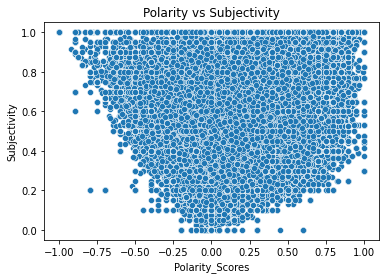

In [ ]:
# lets check relation between Polarity and Subjectivity
sb.scatterplot(sent_df['Polarity_Scores'], sent_df['Subjectivity'])
plt.title('Polarity vs Subjectivity')
plt.show()

## **To check distribution of Polarity and Subjectivity**

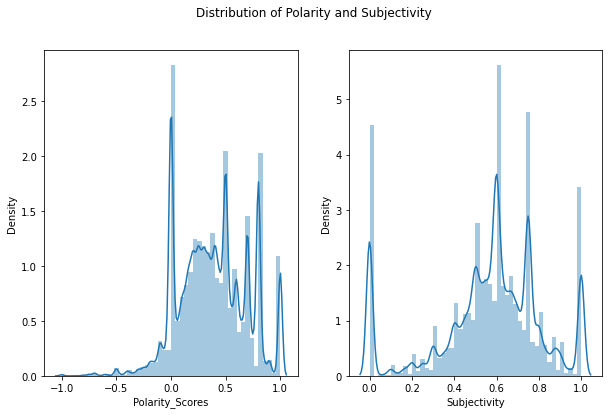

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
sb.distplot(sent_df['Polarity_Scores'])

plt.subplot(1, 2, 2)
sb.distplot(sent_df['Subjectivity'])

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

In [ ]:
# to save the data in csv file
sent_df.to_csv("/content/drive/MyDrive/A_exported_files/A_Sentiment_Analysis_Data.csv",index=False)

In [ ]:
# to check value counts
sent_df['Analysis'].value_counts()

positive    1091218
neutral      228678
negative      53686
Name: Analysis, dtype: int64

In [ ]:
analysis_count=pd.DataFrame(sent_df['Analysis'].value_counts()).T
analysis_count

,positive,neutral,negative
Analysis,1091218,228678,53686


In [ ]:
print("How people are reacting based on the products : ")
analysis_count.plot_bokeh.bar()

How people are reacting based on the products : 


Figure(id='1038', ...)

## **_Data Splitting into "Train" and "Test" into 70:30 ratio_**

In [ ]:
train,test=train_test_split(sent_df,test_size=0.3)

## **_To convert data into text format_**

In [ ]:
train.to_csv("train.data",columns=['final_text'],index=False,header=False)
test.to_csv("test.data",columns=['final_text'],index=False,header=False)

## **_To Train the model_**

In [ ]:
model=fasttext.train_supervised(input="train.data")

## **_To test the model using "Test" data_**

In [ ]:
test_num, precision, recall=model.test("test.data")

In [ ]:
print("Precision : ",round(precision,3),"Recall : ",round(recall,3))

Precision :  0.98 Recall :  0.98


## **Evaluate the model**

In [ ]:
f1_score1=(2*precision*recall)/(precision+recall)
print("F1_score : ",round(f1_score1,2))

F1_score :  0.98


## **Using Hyperparameters**

In [ ]:
hyper=[]
for epoch in [20,30]:
  for k in [1,2]:
    for thres in [0.1,0.2]:
      model1 = fasttext.train_supervised(input='train.data', epoch=epoch, wordNgrams=3, bucket=20000)
      test_num1, precision1, recall1 = model1.test('test.data', k=k, threshold=thres)
      f_score1 = (2*precision1*recall1)/(precision1+recall1)
      hyper.append((epoch,k,thres,round(f_score1,2)))


In [ ]:
hyper_df=pd.DataFrame(hyper)
hyper_df.rename(columns={0:'epoch',1:'k',2:'thres',3:'f1_score'},inplace=True)

In [ ]:
# to store the hyper_df data into csv file
hyper_df.to_csv('/content/drive/MyDrive/exported files/hyper_df.csv',index=False)

In [ ]:
hyper_df

Conclusion : 
* With default parameters values we got F1_score as 0.86
* With hyperparameters the F1_score is less than the default parameters score. So, we can say that default parameters is best to train our model.

## **Vader Sentiment Analyzer**

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
vader_data=sent_df[['reviewText','clean']]

In [ ]:
vader_data

,reviewText,clean
0,"The answer, of course, is no. A lot of time ha...",answer course lot time spent whining stuff hul...
1,"A bit outdated, from a special-effects/technol...",bit outdated specialeffectstechnology pointofv...
2,Thank you,thank
3,very good,good
4,This is good for someone who is trying to make...,good trying decision think help good decision
...,...,...
1373577,It worked well for almost 2 months and then I ...,worked months change lock lock week come find ...
1373578,I bought this to use as a base shape while des...,bought use base shape designing small flowers ...
1373579,ok,ok
1373580,Awesome and perfect for my art work thnk you f...,awesome perfect art work thnk super fast delivery


In [ ]:
vader_data['scores'] = vader_data['clean'].apply(lambda x: sid.polarity_scores(x))
vader_data['compound']  = vader_data['scores'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
vader_data.head()

,reviewText,clean,scores,compound
0,"The answer, of course, is no. A lot of time ha...",answer course lot time spent whining stuff hul...,"{'neg': 0.168, 'neu': 0.571, 'pos': 0.261, 'co...",0.8255
1,"A bit outdated, from a special-effects/technol...",bit outdated specialeffectstechnology pointofv...,"{'neg': 0.251, 'neu': 0.584, 'pos': 0.165, 'co...",-0.9260
2,Thank you,thank,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.3612
3,very good,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404
4,This is good for someone who is trying to make...,good trying decision think help good decision,"{'neg': 0.0, 'neu': 0.32, 'pos': 0.68, 'compou...",0.8176


In [ ]:
vader_data['Vader sentiment']=vader_data['compound'].apply(getAnalysis)

In [ ]:
analysis_count1=pd.DataFrame(vader_data['Vader sentiment'].value_counts()).T
analysis_count1

,positive,neutral,negative
Vader sentiment,1164558,145684,63340


In [ ]:
print("How people are reacting based on the products : ")
analysis_count1.plot_bokeh.bar()

How people are reacting based on the products : 


Figure(id='1217', ...)

In [ ]:
vader_data['Vader sentiment']="__label__"+vader_data['Vader sentiment'].astype(str)     

In [ ]:
vader_data['final_text']=vader_data['Vader sentiment']+" "+vader_data['clean']
vader_data

,reviewText,clean,scores,compound,Vader sentiment,final_text
0,"The answer, of course, is no. A lot of time ha...",answer course lot time spent whining stuff hul...,"{'neg': 0.168, 'neu': 0.571, 'pos': 0.261, 'co...",0.8255,__label__positive,__label__positive answer course lot time spent...
1,"A bit outdated, from a special-effects/technol...",bit outdated specialeffectstechnology pointofv...,"{'neg': 0.251, 'neu': 0.584, 'pos': 0.165, 'co...",-0.9260,__label__negative,__label__negative bit outdated specialeffectst...
2,Thank you,thank,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.3612,__label__positive,__label__positive thank
3,very good,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,__label__positive,__label__positive good
4,This is good for someone who is trying to make...,good trying decision think help good decision,"{'neg': 0.0, 'neu': 0.32, 'pos': 0.68, 'compou...",0.8176,__label__positive,__label__positive good trying decision think h...
...,...,...,...,...,...,...
1373577,It worked well for almost 2 months and then I ...,worked months change lock lock week come find ...,"{'neg': 0.285, 'neu': 0.591, 'pos': 0.124, 'co...",-0.7845,__label__negative,__label__negative worked months change lock lo...
1373578,I bought this to use as a base shape while des...,bought use base shape designing small flowers ...,"{'neg': 0.052, 'neu': 0.855, 'pos': 0.093, 'co...",0.2732,__label__positive,__label__positive bought use base shape design...
1373579,ok,ok,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2960,__label__positive,__label__positive ok
1373580,Awesome and perfect for my art work thnk you f...,awesome perfect art work thnk super fast delivery,"{'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'comp...",0.9136,__label__positive,__label__positive awesome perfect art work thn...


In [ ]:
train1,test1=train_test_split(vader_data,test_size=0.3)

In [ ]:
train1.to_csv("train1.data",columns=['final_text'],index=False,header=False)
test1.to_csv("test1.data",columns=['final_text'],index=False,header=False)

In [ ]:
model1=fasttext.train_supervised(input="train1.data")

In [ ]:
test_num1, precision1, recall1=model1.test("test1.data")

In [ ]:
print("Precision : ",round(precision1,3),"Recall : ",round(recall1,3))

Precision :  0.989 Recall :  0.989


In [ ]:
f1_score_1=(2*precision1*recall1)/(precision1+recall1)
print("F1_score : ",round(f1_score_1,2))

F1_score :  0.99


In [ ]:
# copmaring result sentiments of 2 techniques
a=vader_data[['clean','Vader sentiment']]
b=sent_df['Analysis1']
compare=pd.concat([a,b],axis=1)

In [ ]:
compare

,clean,Vader sentiment,Analysis1
0,answer course lot time spent whining stuff hul...,__label__positive,__label__positive
1,bit outdated specialeffectstechnology pointofv...,__label__negative,__label__neutral
2,thank,__label__positive,__label__neutral
3,good,__label__positive,__label__positive
4,good trying decision think help good decision,__label__positive,__label__positive
...,...,...,...
1373577,worked months change lock lock week come find ...,__label__negative,__label__negative
1373578,bought use base shape designing small flowers ...,__label__positive,__label__negative
1373579,ok,__label__positive,__label__positive
1373580,awesome perfect art work thnk super fast delivery,__label__positive,__label__positive


In [ ]:
compar_csv=compare[compare['Vader sentiment']!=compare['Analysis1']]

In [ ]:
compar_csv

,clean,Vader sentiment,Analysis1
1,bit outdated specialeffectstechnology pointofv...,__label__negative,__label__neutral
2,thank,__label__positive,__label__neutral
8,hbotb dvd book lot complete,__label__neutral,__label__positive
11,reccommend book new parents,__label__neutral,__label__positive
14,son daughterinlaw overly taken contents book f...,__label__neutral,__label__negative
...,...,...,...
1373566,getting genuine refills factory packaging save...,__label__neutral,__label__positive
1373568,delivered advertised quick service,__label__neutral,__label__positive
1373574,like going order,__label__positive,__label__neutral
1373576,scanner actually works faxes scans copies use ...,__label__positive,__label__neutral


In [ ]:
compar_csv.to_csv('/content/drive/MyDrive/A_exported_files/A_textblov_vs_vader.csv',index=False)

### ** Text Blob vs Vader Sentiment Analyzer**

In [ ]:
from collections import Counter
common_words=Counter(" ".join(sent_df["clean"]).split()).most_common(150)

In [ ]:
compare=[]
for i in dict(common_words).keys():
  #print(i)
  
  #print("For word ---> {} ---> using Textblob ({} , {}) ---> using vader ({} , {})".format(i,getPolarity(i),getAnalysis(getPolarity(i)),
                                                          #                          sid.polarity_scores(i)['compound'],getAnalysis(sid.polarity_scores(i)['compound'])))
  compare.append((i,getPolarity(i),getAnalysis(getPolarity(i)),sid.polarity_scores(i)['compound'],getAnalysis(sid.polarity_scores(i)['compound'])))

In [ ]:
compare_df=pd.DataFrame(compare)
compare_df

,0,1,2,3,4
0,great,0.8,positive,0.6249,positive
1,album,0.0,neutral,0.0000,neutral
2,good,0.7,positive,0.4404,positive
3,like,0.0,neutral,0.3612,positive
4,cd,0.0,neutral,0.0000,neutral
...,...,...,...,...,...
145,musical,0.0,neutral,0.0000,neutral
146,wanted,0.0,neutral,0.0000,neutral
147,kind,0.6,positive,0.5267,positive
148,tape,0.0,neutral,0.0000,neutral


In [ ]:
compare_df[compare_df[2]!=compare_df[4]]

,0,1,2,3,4
3,like,0.000000,neutral,0.3612,positive
13,sound,0.400000,positive,0.0000,neutral
17,new,0.136364,positive,0.0000,neutral
25,little,-0.187500,negative,0.0000,neutral
39,fan,0.000000,neutral,0.3182,positive
50,old,0.100000,positive,0.0000,neutral
53,live,0.136364,positive,0.0000,neutral
54,recommend,0.000000,neutral,0.3612,positive
63,right,0.285714,positive,0.0000,neutral
69,far,0.100000,positive,0.0000,neutral


In [ ]:

print("For word ---> good ---> using Textblob ({} , {}) ---> using vader ({} , {})".format(getPolarity('good'),getAnalysis(getPolarity('good')),
                                                                                    sid.polarity_scores('good')['compound'],getAnalysis(sid.polarity_scores('good')['compound'])))
print("For word ---> recommend ---> using Textblob ({} , {}) ---> using vader ({} , {})".format(getPolarity('recommend'),getAnalysis(getPolarity('recommend')),
                                                                            sid.polarity_scores('recommend')['compound'],getAnalysis(sid.polarity_scores('recommend')['compound'])))
print("For word ---> perfect ---> using Textblob ({} , {}) ---> using vader ({} , {})".format(getPolarity('perfect'),getAnalysis(getPolarity('perfect')),
                                                                            sid.polarity_scores('perfect')['compound'],getAnalysis(sid.polarity_scores('perfect')['compound'])))
print("For word ---> tasteless ---> using Textblob ({} , {}) ---> using vader ({} , {})".format(getPolarity('tasteless'),getAnalysis(getPolarity('tasteless')),
                                                                            sid.polarity_scores('tasteless')['compound'],getAnalysis(sid.polarity_scores('tasteless')['compound'])))
print("For word ---> fan ---> using Textblob ({} , {}) ---> using vader ({} , {})".format(getPolarity('fan'),getAnalysis(getPolarity('fan')),
                                                                            sid.polarity_scores('fan')['compound'],getAnalysis(sid.polarity_scores('fan')['compound'])))


For word ---> good ---> using Textblob (0.7 , positive) ---> using vader (0.4404 , positive)
For word ---> recommend ---> using Textblob (0.0 , neutral) ---> using vader (0.3612 , positive)
For word ---> perfect ---> using Textblob (1.0 , positive) ---> using vader (0.5719 , positive)
For word ---> tasteless ---> using Textblob (-0.6 , negative) ---> using vader (0.0 , neutral)
For word ---> fan ---> using Textblob (0.0 , neutral) ---> using vader (0.3182 , positive)


In [ ]:
print("For word ---> fan ---> using Textblob ({} , {}) ---> using vader ({} , {})".format(getPolarity('The product is average'),getAnalysis(getPolarity('The product is average')),
                                                                            sid.polarity_scores('The product is average')['compound'],getAnalysis(sid.polarity_scores('The product is average')['compound'])))


For word ---> fan ---> using Textblob (-0.15 , negative) ---> using vader (0.0 , neutral)


**Conclusion : There is no very much change in the accuracy of 2 techniques. We can use either TextBlob or Vader analysis. So, here we will go with TextBlob**

## **Logistic Regression**

In [ ]:
text=sent_df[['clean','Analysis']]

In [ ]:
text['Target']=label_encoder.fit_transform(text['Analysis'])

In [ ]:
label_train=pd.DataFrame()
label_train['classes']=pd.DataFrame(text['Target'].value_counts().index)
label_train['Sentiments']=pd.DataFrame(text['Analysis'].value_counts().index)
label_train

,classes,Sentiments
0,2,positive
1,1,neutral
2,0,negative


In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(text['clean'],text['Target'], test_size = 0.30, random_state = 42)

In [ ]:
print(" Length of x_train : ",x_train1.shape)
print(" Length of x_test : ",x_test1.shape)
print(" Length of y_train : ",y_train1.shape)
print(" Length of y_test : ",y_test1.shape)

 Length of x_train :  (961507,)
 Length of x_test :  (412075,)
 Length of y_train :  (961507,)
 Length of y_test :  (412075,)


### Converting text data into vector form

In [ ]:

myvector=TfidfVectorizer()
x_train1=myvector.fit_transform(x_train1)
x_train1.shape

(961507, 506897)

In [ ]:
x_test1 = myvector.transform(x_test1)
x_test1.shape

(412075, 506897)

### Classify data using one vs rest with Logistic Regression

In [ ]:
%%time
model1 = LogisticRegression(max_iter=200, verbose=1)
ovr = OneVsRestClassifier(model1)
# fit the model on the training data
ovr.fit(x_train1, y_train1)
y_pred = ovr.predict(x_test1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 4min 25s, sys: 2min 48s, total: 7min 14s
Wall time: 4min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


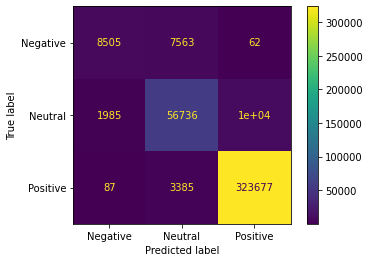

In [ ]:
plot_confusion_matrix(ovr,x_test1,y_test1,display_labels=['Negative','Neutral','Positive'])

In [ ]:

print('accuracy  :', round(accuracy_score(y_test1, y_pred),2))
print('recall    :', round(recall_score(y_test1, y_pred, average='weighted'),2))
print('f1-score  :', round(f1_score(y_test1, y_pred, average='weighted'),2))
print('precision :', round(precision_score(y_test1, y_pred,average='weighted'),2))

accuracy  : 0.94
recall    : 0.94
f1-score  : 0.94
precision : 0.94


# **Classification using MultinomialNB classifier**

In [ ]:
clf=MultinomialNB()
clf.fit(x_train1, y_train1) 

MultinomialNB()

In [ ]:
y_pred_2=clf.predict(x_test1)

In [ ]:
print('accuracy  :', round(accuracy_score(y_test1, y_pred_2),2))
print('recall    :', round(recall_score(y_test1, y_pred_2, average='weighted'),2))
print('f1-score  :', round(f1_score(y_test1, y_pred_2, average='weighted'),2))
print('precision :', round(precision_score(y_test1, y_pred_2,average='weighted'),2))

accuracy  : 0.8
recall    : 0.8
f1-score  : 0.71
precision : 0.83


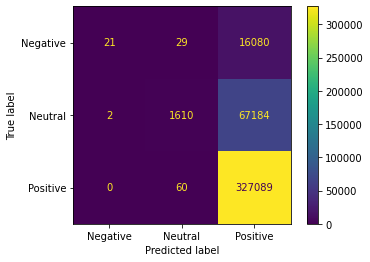

In [ ]:
plot_confusion_matrix(clf,x_test1,y_test1,display_labels=['Negative','Neutral','Positive'])

In [ ]:
print(" F1- Score for FastText model : ",round(f1_score1,2))
print(" F1- Score for Logistic Regression (OVR) model : ",round(f1_score(y_test1, y_pred, average='weighted'),2))
print(" F1- Score for Multinomial NB model : ",round(f1_score(y_test1, y_pred_2, average='weighted'),2))

 F1- Score for FastText model :  0.98
 F1- Score for Logistic Regression (OVR) model :  0.94
 F1- Score for Multinomial NB model :  0.71


Conclusion : Based on the F1-Score we can say that Logistic Regression is the best to train the model.

## **Predictions on new data**

In [ ]:
def new_predictions(new_text):
  print("-"*100)
  print(Fore.BLUE+"Actual Results ");print(Style.RESET_ALL)
  polarity_score=print("Polarity Score  : ",round(getPolarity(new_text),2))
  analysis=print("This review is  :",getAnalysis(getPolarity(new_text)));print("-"*100)
  print(Fore.BLUE+"Predicted Results");print(Style.RESET_ALL)
  print(model.predict(new_text)[0])
  print('with probability of {}'.format(model.predict(new_text)[1]))


In [ ]:
new_text=input("Enter a text    : ")
new_predictions(new_text)


Enter a text    : I loved that particular book
----------------------------------------------------------------------------------------------------
Actual Results 

Polarity Score  :  0.43
This review is  : positive
----------------------------------------------------------------------------------------------------
Predicted Results

('__label__positive',)
with probability of [1.00001001]


### The below link take u to the page which contains brand names of different sentiments

[Brands_of_sentiments](https://drive.google.com/file/d/1CWoZFJSb_Ru73yJOxuS_7Ojjuu6WYZmU/view?usp=share_link)